## FRONT PROFILE

Text(0, 0.5, 'Shear (kN/in^2)')

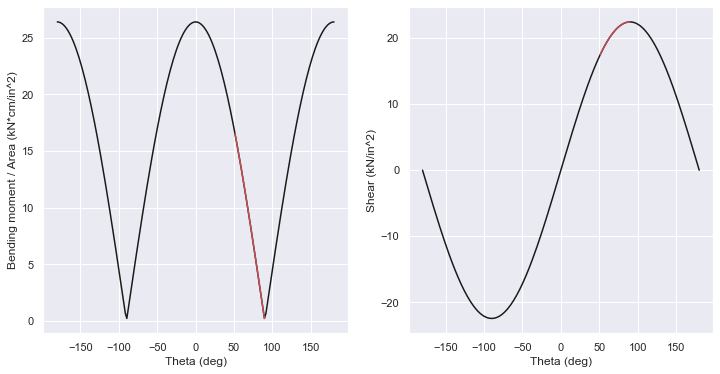

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

def bending_moment(width, thickness, height, force, theta):
    v = np.array([force*np.cos(theta),force*np.sin(theta)])
    x = np.array([0,height])
    moment = abs(np.cross(v,x))/(width*thickness)
    return moment

def shear(radius, thickness, force, theta):
    return (force*np.sin(theta))/(np.pi*radius)

theta = np.linspace(-np.pi,np.pi,180)
thickness = 0.5
height = 1.20
width = 1.5
force = 16.5
radius = 15/64
bm = [bending_moment(width, thickness, height, force, x) for x in theta]
sh = [shear(radius, thickness, force, x) for x in theta]
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.plot(theta*180/np.pi,bm,'k')
theta2 = np.linspace(65*np.pi/180,90*np.pi/180,180)
bm = bm[115:135]
plt.plot((theta*180/np.pi)[115:135],bm,'r')
plt.xlabel("Theta (deg)")
plt.ylabel("Bending moment / Area (kN*cm/in^2)")
plt.subplot(122)
plt.plot((theta*180/np.pi),sh,'k')
plt.plot((theta*180/np.pi)[115:135],sh[115:135],'r')
plt.xlabel("Theta (deg)")
plt.ylabel("Shear (kN/in^2)")

## SIDE PROFILE

Text(0, 0.5, 'Shear (kN/in^2)')

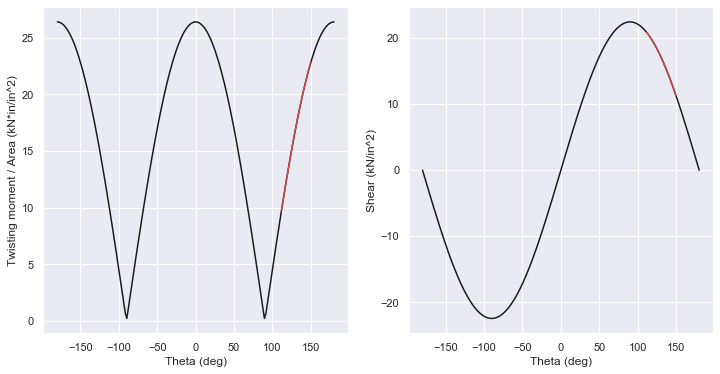

In [19]:
def twisting_moment(width, thickness, height, force, phi):
    v = np.array([force*np.cos(phi),force*np.sin(phi)])
    x = np.array([0,height])
    moment = abs(np.cross(v,x))/(width*thickness)
    return moment

def shear(radius, thickness, force, phi):
    return (force*np.sin(phi))/(np.pi*radius)

phi = np.linspace(-np.pi,np.pi,180)
thickness = 0.5
height = 1.20
width = 1.5
force = 16.5
radius = 15/64
bm = [bending_moment(width, thickness, height, force, x) for x in phi]
sh = [shear(radius, thickness, force, x) for x in phi]
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.plot(phi*180/np.pi,bm,'k')
plt.plot((phi*180/np.pi)[145:165],bm[145:165],'r')
plt.xlabel("Theta (deg)")
plt.ylabel("Twisting moment / Area (kN*in/in^2)")
plt.subplot(122)
plt.plot(phi*180/np.pi,sh,'k')
plt.plot((phi*180/np.pi)[145:165],sh[145:165],'r')
plt.xlabel("Theta (deg)")
plt.ylabel("Shear (kN/in^2)")

## COMBINED PROFILE

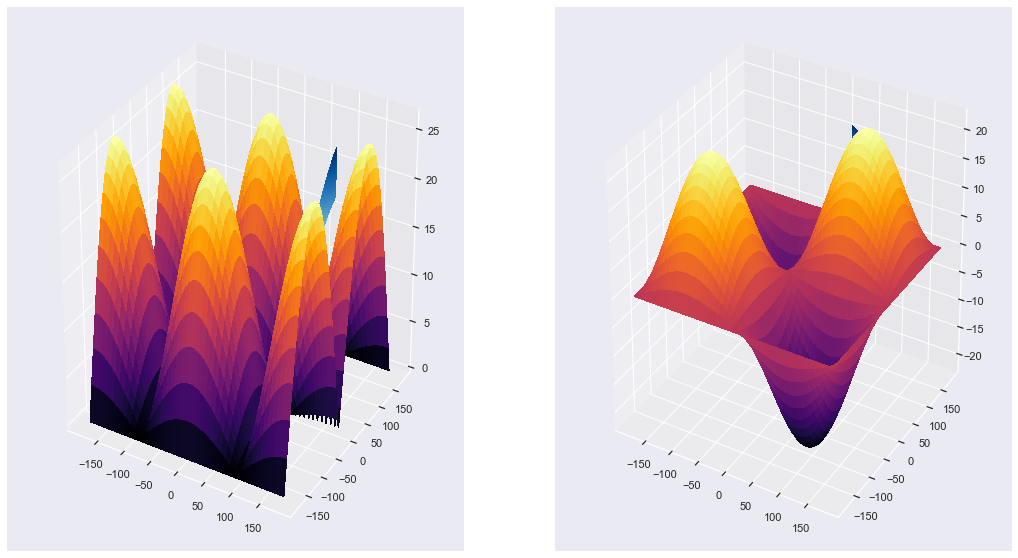

In [35]:
def bending_moment(width, thickness, height, force, theta, phi):
    v = np.array([force*np.sin(theta)*np.cos(phi),force*np.sin(theta)*np.sin(phi)])
    x = np.array([0,height])
    moment = abs(np.cross(v,x))/(width*thickness)
    return moment

def shear(radius, thickness, force, theta, phi):
    return (force*np.sin(theta)*np.sin(phi))/(np.pi*radius)
theta = np.linspace(-np.pi,np.pi,180)
phi = np.linspace(-np.pi,np.pi,180)
theta2 = np.linspace(-np.pi,np.pi,180)[115:135]
phi2 = np.linspace(-np.pi,np.pi,180)[145:165]
moment_matrix = np.empty(shape=(len(theta),len(phi)))
shear_matrix = np.empty(shape=(len(theta),len(phi)))
moment_matrix2 = np.empty(shape=(len(theta2),len(phi2)))
shear_matrix2 = np.empty(shape=(len(theta2),len(phi2)))
thickness = 0.5
height = 1.20
width = 1.5
force = 16.5
radius = 15/64
for i,x in enumerate(theta):
    for j,y in enumerate(phi):
        moment_matrix[i][j]=bending_moment(width, thickness, height, force, x,y)
        shear_matrix[i][j]=shear(radius, thickness, force,x,y)
    
for i,x in enumerate(theta2):
    for j,y in enumerate(phi2):
        moment_matrix2[i][j]=bending_moment(width, thickness, height, force, x,y)
        shear_matrix2[i][j]=shear(radius, thickness, force,x,y)
    
theta,phi = np.meshgrid(phi,theta)
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (18,10))
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(theta*180/np.pi, phi*180/np.pi, moment_matrix, cmap='inferno',linewidth=0, antialiased=False)
ax.plot_surface((theta2*180/np.pi), (phi2*180/np.pi), moment_matrix2, cmap='Blues',linewidth=0, antialiased=False)
ax = fig.add_subplot(122, projection='3d')
ax.plot_surface(theta*180/np.pi, phi*180/np.pi, shear_matrix, cmap='inferno',linewidth=0, antialiased=False)
ax.plot_surface(theta2*180/np.pi, phi2*180/np.pi, shear_matrix2, cmap='Blues',linewidth=0, antialiased=False)